In [1]:
from h5toolspy import H5Processor
from picplot import fieldGrid, histGrid
import matplotlib
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [16, 8]
# root = '/global/homes/j/jdonaghy/jobs/test_ckpt/'
root = '/global/homes/j/jdonaghy/jobs/RELEASE2D/'
root = '/global/homes/j/jdonaghy/m3741/flatfoil_3d_gpu/'

Loading rho_e from File: pfd_moments.005000.xdmf
Loading rho_e from File: pfd_moments.006000.xdmf
Loading rho_e from File: pfd_moments.007000.xdmf
Loading rho_e from File: pfd_moments.008000.xdmf
Loading rho_e from File: pfd_moments.009000.xdmf
Loading hx_fc from File: pfd.005000.xdmf
Loading hx_fc from File: pfd.006000.xdmf
Loading hx_fc from File: pfd.007000.xdmf
Loading hx_fc from File: pfd.008000.xdmf
Loading hx_fc from File: pfd.009000.xdmf


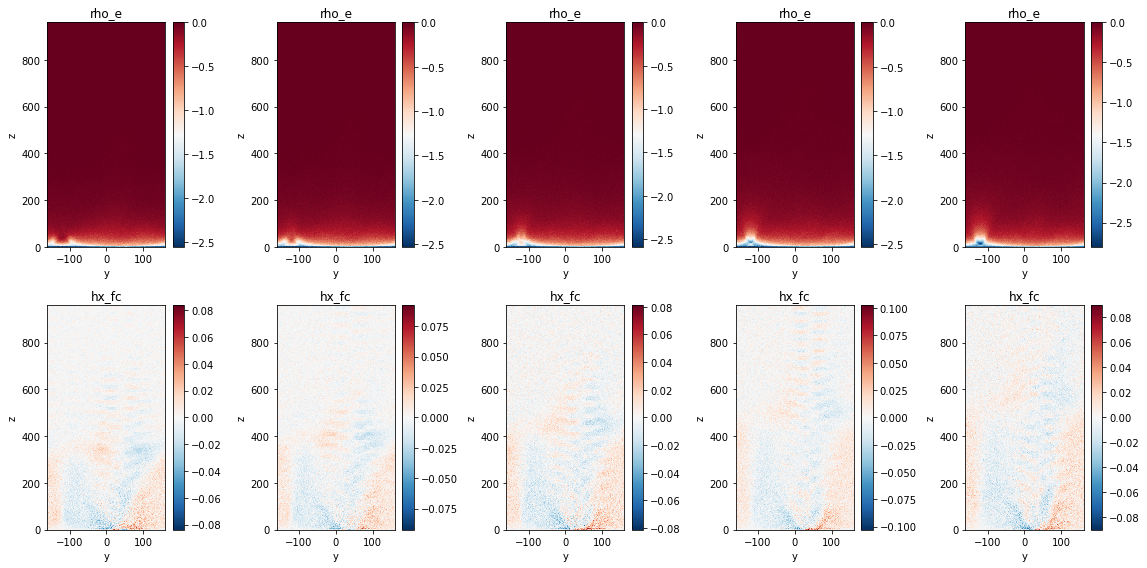

In [6]:
# fieldGrid(root, ['rho_e', 'hx_fc', 'hy_fc', 'hz_fc'], [1,2,3,4,5], xrange=(0,0), zrange=(0,None), timeAveraged=False)
fieldGrid(root, ['rho_e', 'hx_fc'], [5,6,7,8,9], xrange=(0,0), zrange=(0,None), timeAveraged=False)

/global/homes/j/jdonaghy/.conda/envs/psc_env/lib/python3.9/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


Loading hx_fc from File: pfd.007000.xdmf
(200, 320, 1)


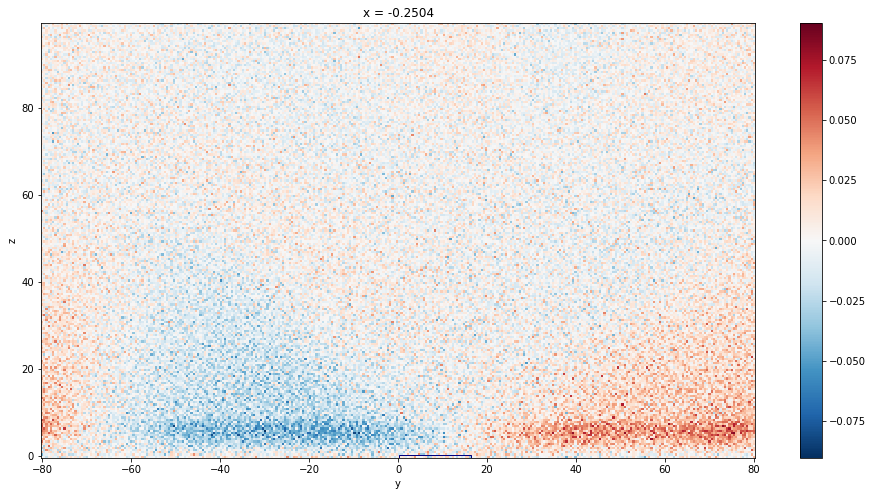

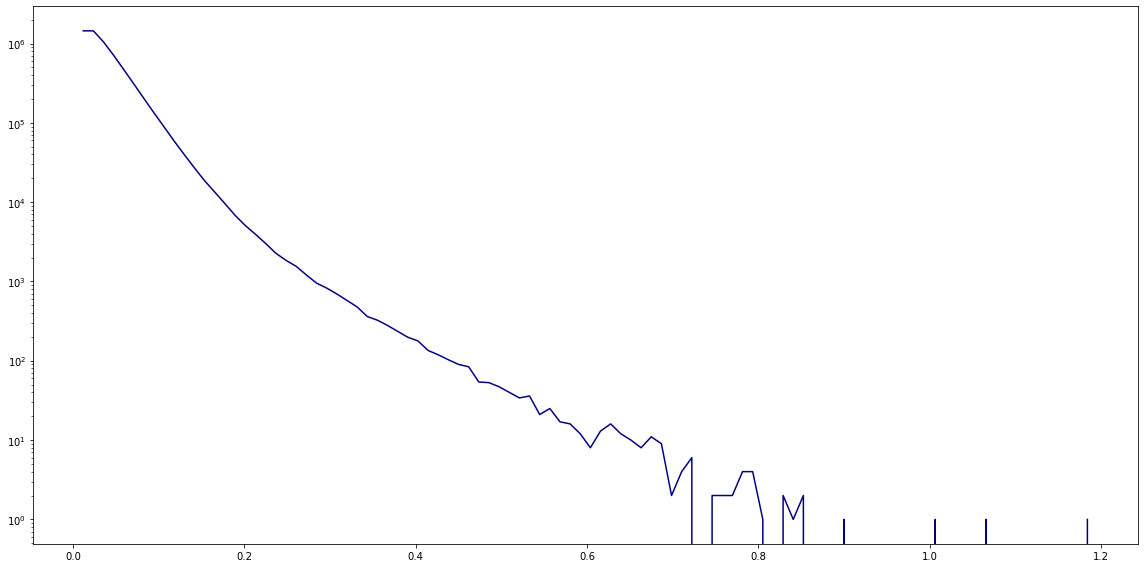

In [3]:

origin = (0, 0)

histGrid(root, 'hx_fc', -2, (1,1), origin, cellsPerPatch=32, xrange=(0,0), zrange=(0,100), timeAveraged=False)

Loading txx_e from File: tfd_moments.017000.xdmf
Loading tyy_e from File: tfd_moments.017000.xdmf
Loading tzz_e from File: tfd_moments.017000.xdmf
Loading rho_e from File: tfd_moments.017000.xdmf
(-16.0, 96.26504141272085) 32 32
(-16.0, 192.28004375683713) 32 32
(-16.0, 288.2950461009532) 32 32
(-16.0, 384.31004844506947) 32 32
(-16.0, 496.327551179872) 32 32
(-16.0, 592.342553523988) 32 32
(-16.0, 688.3575558681046) 32 32
(-16.0, 784.3725582122206) 32 32
(-16.0, 896.3900609470229) 32 32


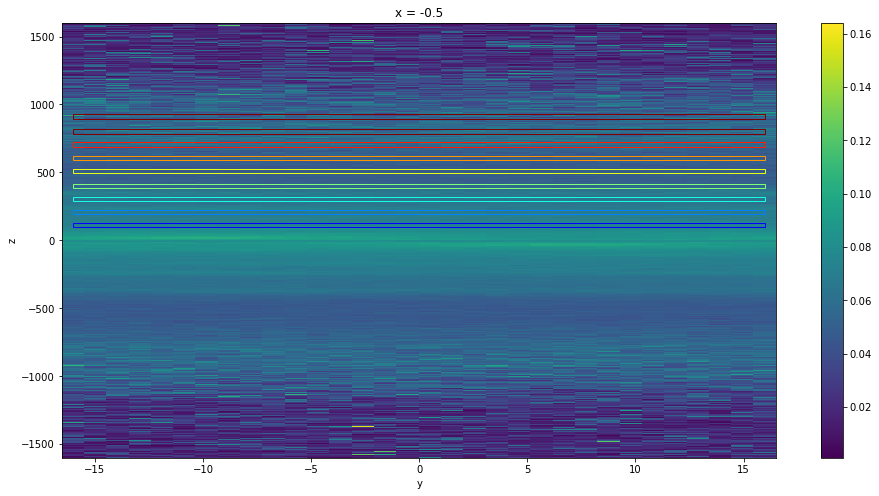

In [9]:
root = '/gpfs/alpine/proj-shared/fus137/johnd/flatfoil-summit_10-5/ratio001NoCollision/' #0.01

globalDims = (1, 32, 2*1600)
corner = (0, 0, 2*1600)
numPatches=1
cellsPerPatch=32

time = -1

h5p = H5Processor(root)


txx = h5p.getH5Grid('txx_e', time)
tyy = h5p.getH5Grid('tyy_e', time)
tzz = h5p.getH5Grid('tzz_e', time)
rho = -h5p.getH5Grid('rho_e', time)
temp = 1/3*(txx+tyy+tzz)/rho
temp.plot()

c = np.arange(1,10)
norm = matplotlib.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.jet)
cmap.set_array([])
histData = []
for i in range(1, 1+len(c)):
    subspace = h5p.selectSubSpace((-5,2), (i*100,i*100+50), color=cmap.to_rgba(i+1))
    histData.append(subspace)